Marathi Devika 20BEC0665
marathi.devika2020@vitstudent.ac.in

#Unzip the file

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/birds data/birds.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/birds data/birds.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.j

# Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)
train = train_gen.flow_from_directory('/content/train_data/train_data',
                                      target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/test_data/test_data',
                                    target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)
     

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

#CNN starts

In [ ]:
# CNN

from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 131s 7s/step - loss: 4.3733 - accuracy: 0.0600 - val_loss: 2.7741 - val_accuracy: 0.0955
Epoch 2/10
19/19 [==============================] - 85s 5s/step - loss: 2.6834 - accuracy: 0.1467 - val_loss: 2.7599 - val_accuracy: 0.1656
Epoch 3/10
19/19 [==============================] - 87s 5s/step - loss: 2.5494 - accuracy: 0.2600 - val_loss: 2.7083 - val_accuracy: 0.2548
Epoch 4/10
19/19 [==============================] - 84s 5s/step - loss: 2.4566 - accuracy: 0.2600 - val_loss: 2.7490 - val_accuracy: 0.2548
Epoch 5/10
19/19 [==============================] - 118s 7s/step - loss: 2.3150 - accuracy: 0.3467 - val_loss: 2.7374 - val_accuracy: 0.1975
Epoch 6/10
19/19 [==============================] - 85s 5s/step - loss: 2.2125 - accuracy: 0.3133 - val_loss: 2.7032 - val_accuracy: 0.2166
Epoch 7/10
19/19 [==============================] - 86s 5s/step - loss: 1.9956 - accuracy: 0.4133 - val_loss: 2.7514 - val_accuracy: 0.2102
Epoch 8/10
19/19 [

In [ ]:
#testing
import numpy as np
from tensorflow.keras.preprocessing import image


In [ ]:
img = image.load_img('/content/sparrow.jpeg',target_size=(120,120))

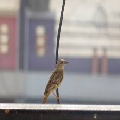

In [ ]:
img

In [ ]:
# Testing 1
img1 = image.load_img('/content/sparow.jpeg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
9
hsparo


In [ ]:
# Testing 2
img2 = image.load_img('/content/greytit.jpeg',target_size=(120,120))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 20ms/step
7
himbul


In [ ]:
# Testing 3
img3 = image.load_img('/content/myna.jpeg',target_size=(120,120))
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
pred = np.argmax(model.predict(img3))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 20ms/step
13
mgprob


In [ ]:
model.save('birds1.h5')

#As we can see it is giving error for some testing instances also the accuracy is not very good. So we will go for Model Tuning

In [ ]:
#case 1: adding more feature extraction layers
model = Sequential()
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(62,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 118, 118, 12)      336       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 59, 59, 12)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 24)        2616      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 24)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 36)        7812      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 36)      

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=50)

Epoch 1/50
19/19 [==============================] - 93s 5s/step - loss: 2.7835 - accuracy: 0.0400 - val_loss: 2.7706 - val_accuracy: 0.0828
Epoch 2/50
19/19 [==============================] - 85s 5s/step - loss: 2.7519 - accuracy: 0.1667 - val_loss: 2.7537 - val_accuracy: 0.1338
Epoch 3/50
19/19 [==============================] - 85s 5s/step - loss: 2.7019 - accuracy: 0.1400 - val_loss: 2.7509 - val_accuracy: 0.1401
Epoch 4/50
19/19 [==============================] - 87s 5s/step - loss: 2.6730 - accuracy: 0.1667 - val_loss: 2.7748 - val_accuracy: 0.1401
Epoch 5/50
19/19 [==============================] - 119s 7s/step - loss: 2.5921 - accuracy: 0.1733 - val_loss: 2.7670 - val_accuracy: 0.1210
Epoch 6/50
19/19 [==============================] - 84s 5s/step - loss: 2.4961 - accuracy: 0.1867 - val_loss: 2.6929 - val_accuracy: 0.1656
Epoch 7/50
19/19 [==============================] - 118s 6s/step - loss: 2.4509 - accuracy: 0.1800 - val_loss: 2.7336 - val_accuracy: 0.1338
Epoch 8/50
19/19 [

#Testing again after model tuning

In [ ]:
# Testing 1
img1 = image.load_img('/content/sparow.jpeg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
9
hsparo


In [ ]:
# Testing 2
img1 = image.load_img('/hilly pigeon.jpg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
6
hilpig


In [ ]:
# Testing 3
img1 = image.load_img('/brown hawk.jpeg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 17ms/step
2
brhkyt


In [ ]:
# Testing 4
img1 = image.load_img('/crow.jpeg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
3
cbrtsh


In [ ]:
# Testing 5
img1 = image.load_img('/myna.jpg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 27ms/step
4
cmnmyn


In [ ]:
model.save('birds2.h5')

Hence we can see that the accuracy of the model is better (around 99%) and the model is performing accurately after tuning.